In [1]:
#Imoprting Essential Liberies
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('housing_train.csv')
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [4]:
# Cecking Which Columns has Null Value
df.isnull().sum().sort_values(ascending=False)

parking_options            95135
laundry_options            54311
lat                         1419
long                        1419
description                    2
state                          1
beds                           0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
dogs_allowed                   0
baths                          0
cats_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
image_url                      0
id                             0
dtype: int64

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [6]:
# Droping Columns Which are not or Less important for reaching Goals
df1=df.drop(['id','url','region_url','image_url','description','lat','long'],axis=1)

In [7]:
df1.isnull().sum().sort_values(ascending=False)

parking_options            95135
laundry_options            54311
state                          1
comes_furnished                0
electric_vehicle_charge        0
wheelchair_access              0
smoking_allowed                0
dogs_allowed                   0
cats_allowed                   0
baths                          0
beds                           0
sqfeet                         0
type                           0
price                          0
region                         0
dtype: int64

In [8]:
df1.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,al


In [9]:
# Visualizing distribution of Dataset
df1.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000
mean,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644
std,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Checking Unique Value in Region Column
df1['region'].nunique()

298

In [15]:
# Checking Unique Value in State Column
df1['state'].nunique()

38

In [16]:
# Checking Unique Value In Parking Column
df1['parking_options'].nunique()

7

In [17]:
# Checking Unique Vakue in Laundry Column
df1['laundry_options'].nunique()

5

In [18]:
# Checking which region has more Data Point. This will help in feature Engineering
df1.groupby('region')['region'].agg('count')

region
SF bay area               2327
akron / canton            1532
albany                    2090
albuquerque               2144
ames                       360
                          ... 
winston-salem             2123
worcester / central MA    1452
yuba-sutter                152
yuma                       215
zanesville / cambridge       3
Name: region, Length: 298, dtype: int64

In [19]:
# Collection some more info to make our model
stats_region_state=df1.groupby('state')['region'].value_counts()
stats_region_state[stats_region_state<20]

state  region                
ca     susanville                15
ky     owensboro                 18
mi     south bend / michiana      1
mo     st louis                   9
       kansas city                3
ms     southwest MS              12
ne     omaha / council bluffs     2
ny     twin tiers NY/PA          18
oh     northern panhandle        17
       dayton / springfield      14
       parkersburg-marietta       7
       toledo                     7
       lima / findlay             4
       tuscarawas co              4
       mansfield                  3
       zanesville / cambridge     3
ok     oklahoma city             19
       lawton                    14
       tulsa                      7
       stillwater                 6
       northwest OK               2
       texoma                     1
or     portland                  14
       bend                      11
       eugene                     7
       medford-ashland            4
       oregon coast               

In [20]:
stats_app_laundry=df1.groupby('type')['laundry_options'].value_counts()
stats_app_laundry

type             laundry_options   
apartment        w/d in unit           73426
                 laundry on site       36440
                 w/d hookups           34418
                 laundry in bldg       25730
                 no laundry on site     1957
assisted living  laundry on site           1
condo            w/d in unit            2807
                 laundry in bldg         566
                 w/d hookups             332
                 laundry on site         324
                 no laundry on site       33
cottage/cabin    w/d in unit             303
                 laundry on site         119
                 no laundry on site      107
                 w/d hookups              78
                 laundry in bldg          31
duplex           w/d hookups            1340
                 w/d in unit            1326
                 laundry on site         242
                 laundry in bldg         219
                 no laundry on site      127
flat             w/

In [111]:
laundry_stats=df1.groupby('laundry_options')['laundry_options'].agg('count')
laundry_stats 

laundry_options
laundry in bldg       27816
laundry on site       39186
no laundry on site     2551
w/d hookups           50252
w/d in unit           91074
Name: laundry_options, dtype: int64

In [17]:
parking_stats=df1.groupby('parking_options')['parking_options'].agg('count')
parking_stats

parking_options
attached garage       27591
carport               28685
detached garage       12798
no parking             1973
off-street parking    88316
street parking        10570
valet parking           122
Name: parking_options, dtype: int64

In [18]:
region_stats=df1.groupby('region')['region'].agg('count').sort_values(ascending=False)
region_stats

region
jacksonville              4246
rochester                 3677
fayetteville              3652
omaha / council bluffs    2727
denver                    2671
                          ... 
kansas city                  3
zanesville / cambridge       3
northwest OK                 2
texoma                       1
east oregon                  1
Name: region, Length: 298, dtype: int64

In [137]:
region_stats[region_stats<1000]

region
okaloosa / walton         942
shreveport                940
flagstaff / sedona        935
syracuse                  918
flint                     916
                         ... 
kansas city                 3
zanesville / cambridge      3
northwest OK                2
texoma                      1
east oregon                 1
Name: region, Length: 192, dtype: int64

In [134]:
state_stats=df1.groupby('state')['state'].agg('count')
state_stats.sort_values(ascending=False)

state
ca    33085
fl    31929
nc    18628
mi    14529
ga    13841
co    11308
ny     9991
il     9706
ks     7910
ia     7488
mn     7468
md     7451
la     7304
az     6752
oh     6558
in     6416
al     6198
nj     5711
ky     5419
ms     4973
ma     4926
id     4466
ct     3765
nd     3428
ar     3149
nm     2917
nv     2846
ne     2697
dc     2502
ak     2169
mo     2158
de     2048
hi     1840
nh     1761
mt     1339
me      420
ok       49
or       44
Name: state, dtype: int64

In [139]:
state_stats[state_stats<2600]

state
ak    2169
dc    2502
de    2048
hi    1840
me     420
mo    2158
mt    1339
nh    1761
ok      49
or      44
Name: state, dtype: int64

In [123]:
state_stats=df1.groupby('type')['type'].agg('count')
state_stats.sort_values(ascending=False)

type
apartment          218032
house               23741
townhouse           10381
condo                4864
duplex               3452
manufactured         3008
cottage/cabin         702
loft                  511
flat                  349
in-law                145
land                    4
assisted living         1
Name: type, dtype: int64

In [21]:
# Extracting that columns which have Boolen Values
bool_var=[var for var in df1 if df1[var].nunique()==2]
df1[bool_var].head()

,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
0,1,1,1,0,0,0
1,1,1,1,0,0,0
2,1,1,1,0,0,0
3,1,1,1,0,0,0
4,1,1,1,0,0,0


In [22]:
# Extracting Columns Which have Numerical values

cont_var=[var for var in df1 if df1[var].dtypes !='O' and var not in bool_var]
df1[cont_var].head()

,price,sqfeet,beds,baths
0,1195,1908,3,2.0
1,1120,1319,3,2.0
2,825,1133,1,1.5
3,800,927,1,1.0
4,785,1047,2,1.0


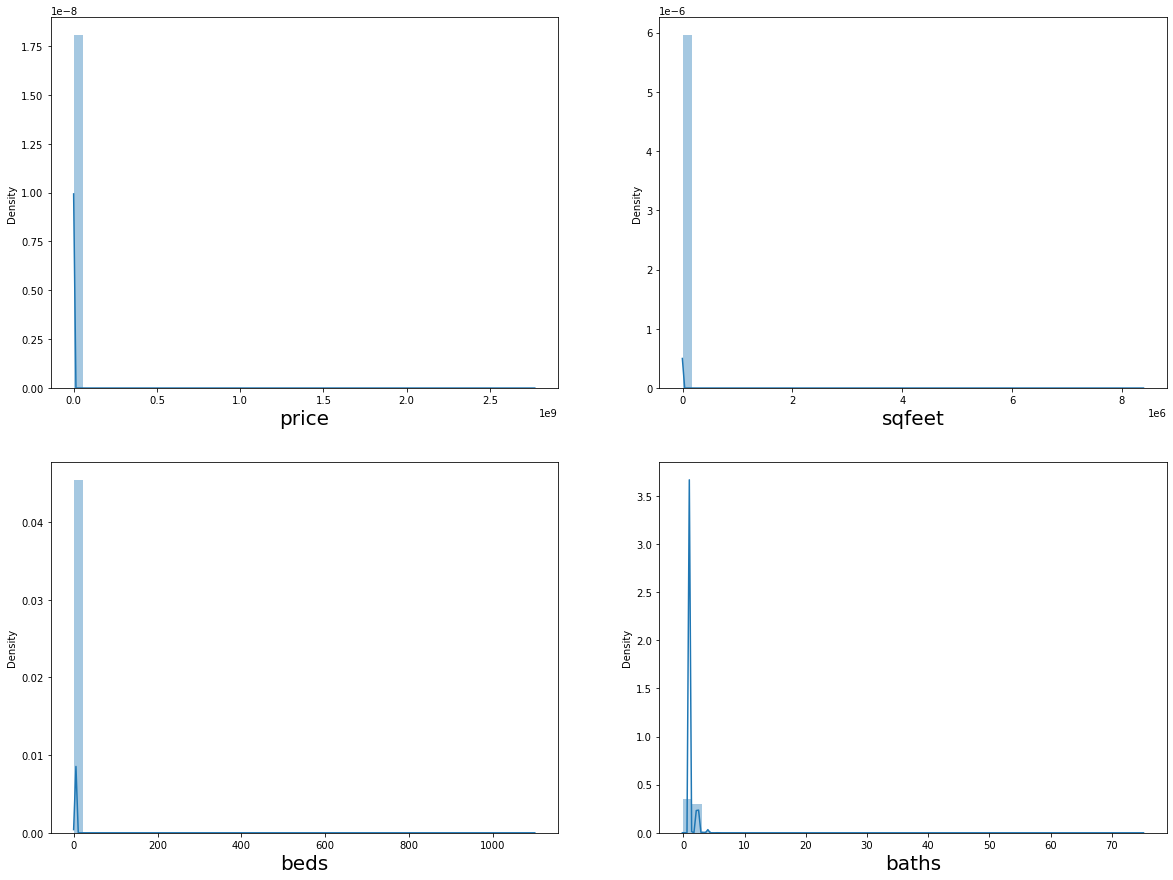

In [23]:
# Ploting DistPlot to see Distribution of Price and SQfeet Columns

plt.figure(figsize=(20,15))
plotnumber=1
for column in cont_var:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df1[cont_var][column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1

plt.show()

In [25]:
df2=df1.copy()

In [25]:
df2.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,al


In [26]:
# Applyinf log transformation in Price and Sqfeet Columns
price_log=np.log(df2['price']+1)

<AxesSubplot:xlabel='price', ylabel='Density'>

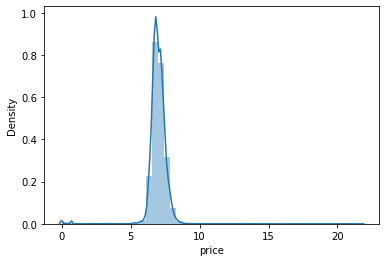

In [27]:
sns.distplot(price_log)

In [28]:
sqfeet_log=np.log(df2['sqfeet']+1)

<AxesSubplot:xlabel='sqfeet', ylabel='Density'>

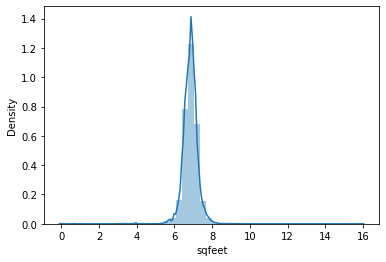

In [29]:
sns.distplot(sqfeet_log)

In [30]:
sqfeet_log

0         7.554335
1         7.185387
2         7.033506
3         6.833032
4         6.954639
            ...   
265185    6.967909
265186    6.928538
265187    7.415175
265188    7.107425
265189    7.170888
Name: sqfeet, Length: 265190, dtype: float64

In [31]:
sqfeet_log.describe()

count    265190.000000
mean          6.838858
std           0.409248
min           0.000000
25%           6.624065
50%           6.857514
75%           7.053586
max          15.942385
Name: sqfeet, dtype: float64

In [32]:
df2['sqfeet']=np.log(df2['sqfeet']+1)

In [33]:
df2.sqfeet.describe()

count    265190.000000
mean          6.838858
std           0.409248
min           0.000000
25%           6.624065
50%           6.857514
75%           7.053586
max          15.942385
Name: sqfeet, dtype: float64

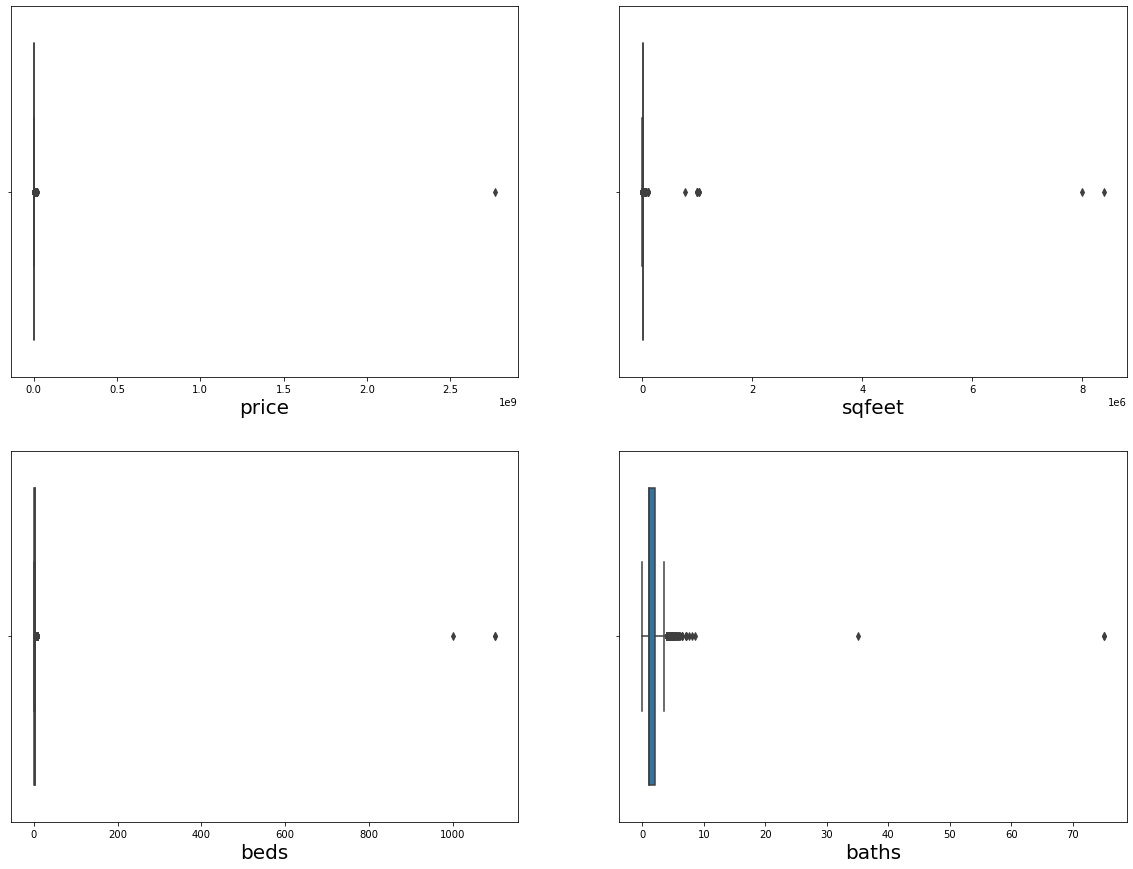

In [69]:
# Ploting BoxPlot to get better visualize of Outlier.
plt.figure(figsize=(20,15))
plotnumber=1
for column in cont_var:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df1[cont_var][column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1

plt.show()

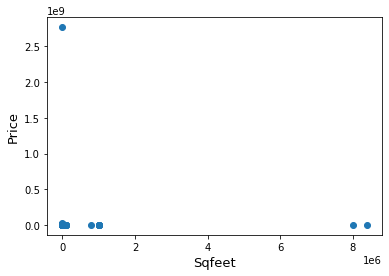

In [87]:
# Ploting Scatter Plot
fig,ax=plt.subplots()
ax=plt.scatter(x=df1['sqfeet'], y=df1['price'])
plt.xlabel('Sqfeet',fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.show()

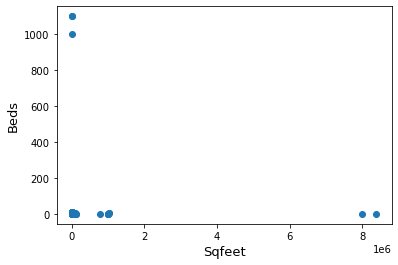

In [89]:
fig,ax=plt.subplots()
ax=plt.scatter(x=df1['sqfeet'],y=df1['beds'])
plt.xlabel('Sqfeet',fontsize=13)
plt.ylabel('Beds',fontsize=13)
plt.show()

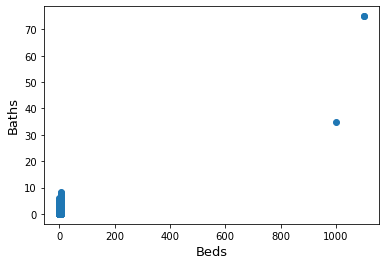

In [91]:
fig,ax=plt.subplots()
ax=plt.scatter(x=df1['beds'], y=df1['baths'])
plt.xlabel('Beds',fontsize=13)
plt.ylabel('Baths',fontsize=13)
plt.show()

# Conclusion

In [28]:
# 1 NUll Value: Except Laundry,Parking,Lat & Long no other Columns has Null value
# 2 Data Distribution: Data are not  normally Distributed. Prrice, Sqfeet, Beds & Baths are highly Right Skewed
# 3 Outlier: To Many Outlier In Baths and Sqfeet Columns
# 4: Contibution Of Data: There are some data point which are contributing less than 10%. 
#We can remove or use some feature engineering technique to handle this type of data point